#### Annissa Pereira- 02126803
#### Tanay Sayala -
# Project 3 - Visual Analytics - Multidimensional Scaling

In this project, MDS (Multidimensional Scaling) serves as a crucial tool for reducing the dimensionality of the TF-IDF matrix, enabling the visualization of document similarities in a lower-dimensional space. By capturing the pairwise distances or dissimilarities between documents, MDS facilitates the preservation of their original relationships while condensing the data for easier interpretation. This allows us to gain insights into the structure and clustering patterns within the document dataset, aiding in the exploration and analysis of document content across various dimensions.

# Document Clustering and Visualization

In this project, we aim to cluster a collection of documents based on their content and visualize the clusters using dimensionality reduction techniques. Here's an overview of the steps involved:

## 1. Data Extraction

We start by extracting the content from each document in the document folder.

## 2. Tokenization and Clustering

Using spaCy, we tokenize the content of each document considering specific entity types such as "DATE", "PERSON", "GPE", "ORG", and "NORP". We then apply K-Means clustering to group similar documents together. This results in 10 clusters, each representing documents with similar content based on the selected entity types.

## 3. Dimensionality Reduction with MDS

To visualize the clustered documents in a lower-dimensional space, we apply Multidimensional Scaling (MDS) to the TF-IDF matrix. MDS reduces the dimensionality of the matrix while preserving the original relationships between documents as much as possible.

## 4. Visualization

The reduced TF-IDF matrix is visualized using a scatter plot, where each point represents a document. The points are colored according to their assigned cluster, allowing us to visually inspect how documents are grouped together based on their content similarities.

## 5. Cluster Analysis

Additionally, we analyze the top 5 most common entities within each cluster to gain insights into the main themes or topics present in each group of documents.

By following these steps, we can effectively extract, cluster, visualize, and analyze the content of documents in the document folder, providing valuable insights and understanding of the data.
erstanding of the data.



### Importing the Necessary Libraries 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import defaultdict
import os
import codecs
import json
import spacy
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np


## Data Extraction

In [30]:
# Set seed for reproducibility
np.random.seed(12)
# Function to preprocess text
def preprocess(text):
    # You can customize this preprocessing step based on your requirements
    return text.lower()

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Folder containing your documents
folder_path = 'C:\\Users\\annis\\Desktop\\Visual Analytics\\Project 1\\dataset'

# List to store preprocessed documents, file names, and file contents
preprocessed_documents = []
file_names = []
file_contents = []

# All files in the folder
all_files = os.listdir(folder_path)

# Append all files to file_names list and their contents to file_contents list
for file in all_files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        with codecs.open(file_path, 'r', 'utf-8') as file:
            content = file.read()
            preprocessed_documents.append(content)
            file_names.append(file_path)
            file_contents.append(content)

In [31]:
import os
import codecs
import numpy as np
import spacy

# Set seed for reproducibility
np.random.seed(12)
# Function to preprocess text
def preprocess(text):
    # You can customize this preprocessing step based on your requirements
    return text.lower()

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Folder containing your documents
folder_path = 'C:\\Users\\annis\\Desktop\\Visual Analytics\\Project 1\\dataset'

# List to store preprocessed documents
preprocessed_documents = []

# All files in the folder
all_files = os.listdir(folder_path)

# Append all files to preprocessed_documents list after preprocessing
for file in all_files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        with codecs.open(file_path, 'r', 'utf-8') as file:
            content = file.read()
            preprocessed_documents.append(preprocess(content))

# Extract entities from documents using spaCy
document_entities = []
for doc in preprocessed_documents:
    doc_entities = []
    parsed_doc = nlp(doc)
    for ent in parsed_doc.ents:
        doc_entities.append(ent.text)
    document_entities.append(doc_entities)

## 2. Tokenization and Clustering

In [32]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import defaultdict
import os
import codecs
import json

def preprocess(text):
    # You can customize this preprocessing step based on your requirements
    return text.lower()

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor=preprocess)

# Folder containing your documents
folder_path = 'C:\\Users\\annis\\Desktop\\Visual Analytics\\Project 1\\dataset'

# List to store preprocessed documents, file names, and file contents
preprocessed_documents = []
file_names = []
file_contents = []

# All files in the folder
all_files = os.listdir(folder_path)

# Append all files to file_names list and their contents to file_contents list
for file in all_files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        with codecs.open(file_path, 'r', 'utf-8') as file:
            content = file.read()
            preprocessed_documents.append(content)
            file_names.append(file_path)
            file_contents.append(content)

# Vectorize the preprocessed documents
X = vectorizer.fit_transform(preprocessed_documents)

# Apply KMeans clustering
num_clusters = 15# Adjust the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state = 15)
kmeans.fit(X)

# Dictionary to store clusters
clusters = defaultdict(list)

# Assign cluster labels to documents
cluster_labels = kmeans.labels_

# Group documents by cluster
for filename, label in zip(file_names, cluster_labels):
    clusters[f'Cluster {label+1}'].append(filename)


total_files = sum(len(files) for files in clusters.values())
print("Total number of files:", total_files)
# Create a dictionary to store the JSON data
json_data = {
    'nodes': [],
    'links': []
}

import os
import json

# Create a dictionary to store the JSON data
json_data = {
    'nodes': [],
    'links': []
}

# Add nodes to the JSON data
for cluster, files in clusters.items():
    # Add cluster node only if it's not already added
    if not any(node['id'] == cluster for node in json_data['nodes']):
        json_data['nodes'].append({'id': cluster, 'type': 'cluster', 'group': 1})  # 'group' is a property that can help categorize nodes

    #for file in files:
        # Assuming file_contents is a list containing the content of each file
     #   content = file_contents[file_names.index(file)]  # Get content by index
      #  json_data['nodes'].append({'id': os.path.basename(file), 'type': 'file', 'group': 2, 'content': content})  # Assign group 2 to files

        # Add a link between the cluster node and the file node
       # json_data['links'].append({'source': cluster, 'target': os.path.basename(file)})

# Save the JSON data to a file
#output_file = 'project_2.json'
#with open(output_file, 'w') as f:
 #   json.dump(json_data, f, indent=4)

#print(f"JSON data saved to {output_file}")


Total number of files: 116


In [33]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Custom tokenizer function that extracts entity types from documents
def custom_tokenizer(text):
    doc = nlp(text)
    return [entity.text for entity in doc.ents if entity.label_ in ["DATE","PERSON", "GPE", "ORG","NORP"]]

# Initialize TfidfVectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Vectorize the preprocessed documents
X = vectorizer.fit_transform(preprocessed_documents)

# Apply KMeans clustering
num_clusters = 10 # Adjust the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=15)
kmeans.fit(X)

# Dictionary to store clusters
clusters = defaultdict(list)

# Assign cluster labels to documents
cluster_labels = kmeans.labels_

# Group documents by cluster
for filename, label in zip(file_names, cluster_labels):
    clusters[f'Cluster {label+1}'].append(filename)


In [34]:
import os

# Iterate through clusters and print cluster name and file names
for cluster, files in clusters.items():
    print(f"Cluster {cluster}:")
    for file in files:
        file_name = os.path.basename(file)
        print(file_name)
    print()  # Add an empty line between clusters for better readability


Cluster Cluster 7:
CIA_01
CIA_05
CIA_17
CIA_31
CIA_34
CIA_39
NSA_05
NSA_14
NSA_22

Cluster Cluster 2:
CIA_02
CIA_06
CIA_08
CIA_12
CIA_13
CIA_15
CIA_16
CIA_33
CIA_37
CIA_40
DIA_01
DIA_02
DIA_03
DIA_docs.txt
FBI_05
FBI_08
FBI_18
FBI_20
FBI_22
FBI_23
FBI_29
FBI_31
FBI_34
FBI_36
NSA_04

Cluster Cluster 1:
CIA_03
CIA_04
CIA_23
CIA_25
CIA_30
CIA_docs.txt
NSA_16

Cluster Cluster 6:
CIA_07
FBI_01
FBI_04
FBI_07
FBI_12
FBI_15
FBI_24
NSA_01
NSA_02
NSA_03
NSA_10

Cluster Cluster 5:
CIA_09
CIA_20
CIA_28
CIA_29
CIA_43
FBI_11
FBI_14
FBI_17
FBI_26
FBI_27
FBI_28
FBI_30
FBI_35
FBI_39
NSA_07
USCBP_02
USCBP_docs.txt

Cluster Cluster 4:
CIA_10
CIA_18
CIA_19
CIA_24
CIA_32
CIA_41
FBI_02
FBI_03
FBI_06
FBI_16
FBI_21
NSA_08

Cluster Cluster 9:
CIA_11
CIA_14
CIA_21
CIA_22
CIA_26
CIA_27
CIA_36
CIA_38
CIA_42
FBI_40
FBI_41
NSA_06
NSA_09
NSA_11
NSA_18
NSA_20

Cluster Cluster 10:
CIA_35
FBI_10
FBI_13
FBI_19
FBI_32
FBI_37
FBI_38
FBI_docs.txt
NSA_12
USCBP_01

Cluster Cluster 8:
FBI_09
FBI_25
FBI_33

Cluster Cluster 3:


In [35]:
from collections import defaultdict

# Dictionary to store entities for each cluster
clustered_entities = defaultdict(list)

# Iterate through each document and its cluster label
for filename, label in zip(file_names, cluster_labels):
    # Extract entities from the document (you may adjust this based on your requirements)
    doc = nlp(preprocessed_documents[file_names.index(filename)])
    entities = [entity.text for entity in doc.ents]
    # Append entities to the corresponding cluster in the dictionary
    clustered_entities[f'Cluster {label+1}'].extend(entities)

# Now clustered_entities contains the entities associated with each cluster


In [36]:
from collections import Counter

# Dictionary to store the top 5 most common entities for each cluster
top_entities_per_cluster = {}

# Iterate through each cluster
for cluster, entities in clustered_entities.items():
    # Count the occurrences of each entity in the cluster
    entity_counter = Counter(entities)
    
    # Get the top 5 most common entities and their frequencies for this cluster
    top_entities = entity_counter.most_common(5)
    
    # Store the top 5 most common entities for this cluster
    top_entities_per_cluster[cluster] = top_entities

# Print the top 5 most common entities for each cluster
for cluster, entities in top_entities_per_cluster.items():
    print(f"Cluster {cluster}:")
    for rank, (entity, frequency) in enumerate(entities, start=1):
        print(f"{rank}. Entity: {entity}, Frequency: {frequency}")
    print()


Cluster Cluster 7:
1. Entity: Moscow, Frequency: 11
2. Entity: Russian, Frequency: 10
3. Entity: Cuba, Frequency: 6
4. Entity: Russia, Frequency: 5
5. Entity: Central Russia Airlines, Frequency: 5

Cluster Cluster 2:
1. Entity: Detroit, Frequency: 19
2. Entity: USA, Frequency: 18
3. Entity: Al Qaeda, Frequency: 17
4. Entity: SCADA, Frequency: 13
5. Entity: American, Frequency: 12

Cluster Cluster 1:
1. Entity: Cuba, Frequency: 19
2. Entity: Havana, Frequency: 17
3. Entity: Cuban, Frequency: 14
4. Entity: Arze, Frequency: 13
5. Entity: Al Qaeda, Frequency: 11

Cluster Cluster 6:
1. Entity: Paris, Frequency: 14
2. Entity: Montreal, Frequency: 7
3. Entity: French, Frequency: 7
4. Entity: Zinedine, Frequency: 6
5. Entity: Mehdi Rafiki, Frequency: 6

Cluster Cluster 5:
1. Entity: FBI, Frequency: 12
2. Entity: two, Frequency: 10
3. Entity: Shakur, Frequency: 10
4. Entity: Karim, Frequency: 10
5. Entity: Hijazi, Frequency: 7

Cluster Cluster 4:
1. Entity: London, Frequency: 8
2. Entity: Baham

TF-IDF Matrix:
                                                    -21   04  1 april, 2003  \
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
...                                                 ...  ...            ...   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   
C:\Users\annis\Desktop\Visual Analytics\Project...  0.0  0.0            0.0   

                                    

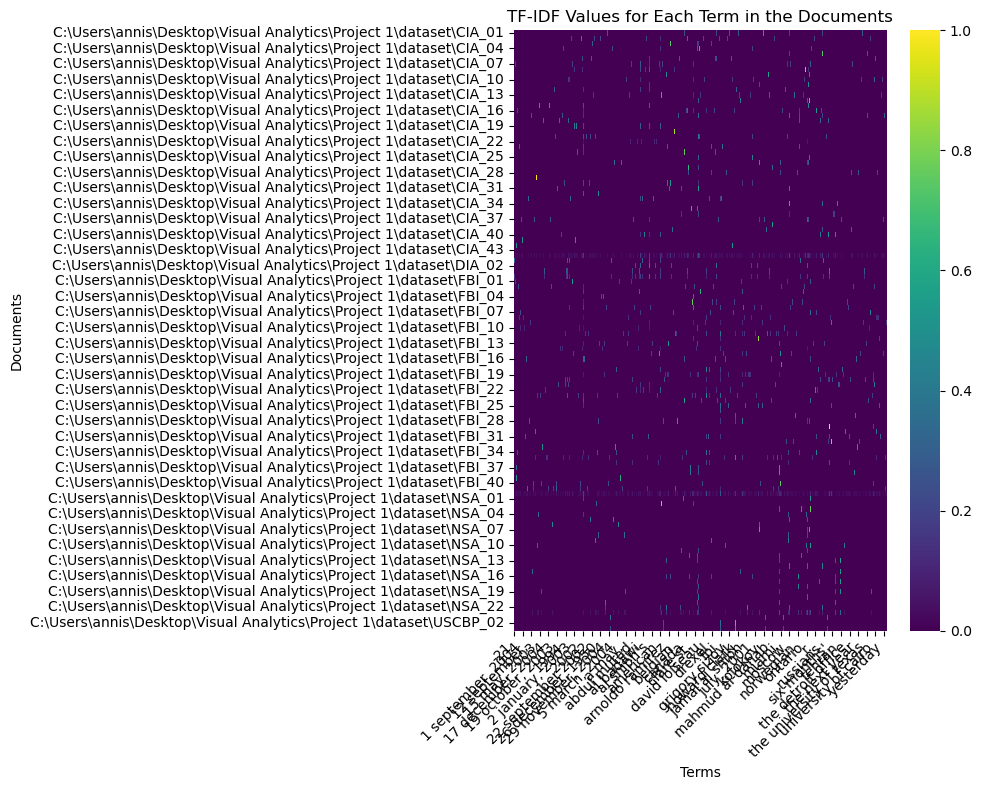

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert TF-IDF matrix to DataFrame for easier viewing
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=file_names)

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_df)

# Convert TF-IDF matrix to DataFrame for visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=file_names)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_df, cmap='viridis', cbar=True)
plt.title('TF-IDF Values for Each Term in the Documents')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [38]:
import os

# Extract file names from full paths
file_names_without_path = [os.path.basename(file) for file in file_names]

# Convert TF-IDF matrix to DataFrame with file names (without path) as rows
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=file_names_without_path)

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_df)



TF-IDF Matrix:
                -21   04  1 april, 2003  1 august  1 december, 2004  \
CIA_01          0.0  0.0            0.0  0.000000               0.0   
CIA_02          0.0  0.0            0.0  0.000000               0.0   
CIA_03          0.0  0.0            0.0  0.000000               0.0   
CIA_04          0.0  0.0            0.0  0.000000               0.0   
CIA_05          0.0  0.0            0.0  0.000000               0.0   
...             ...  ...            ...       ...               ...   
NSA_22          0.0  0.0            0.0  0.000000               0.0   
NSA_docs.txt    0.0  0.0            0.0  0.049776               0.0   
USCBP_01        0.0  0.0            0.0  0.000000               0.0   
USCBP_02        0.0  0.0            0.0  0.000000               0.0   
USCBP_docs.txt  0.0  0.0            0.0  0.000000               0.0   

                1 february, 2004  1 july,  1 may,  1 may, 2004  1 november,  \
CIA_01                       0.0      0.0     0.0    

In [39]:
# Define the file path for saving the CSV file
csv_file_path = 'tfidf_matrix.csv'

# Save the TF-IDF matrix DataFrame to a CSV file
tfidf_df.to_csv(csv_file_path)

print("TF-IDF Matrix saved to:", csv_file_path)


TF-IDF Matrix saved to: tfidf_matrix.csv



## 3. Dimensionality Reduction with MDS, Clustering and Visulization

C:\Users\annis\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


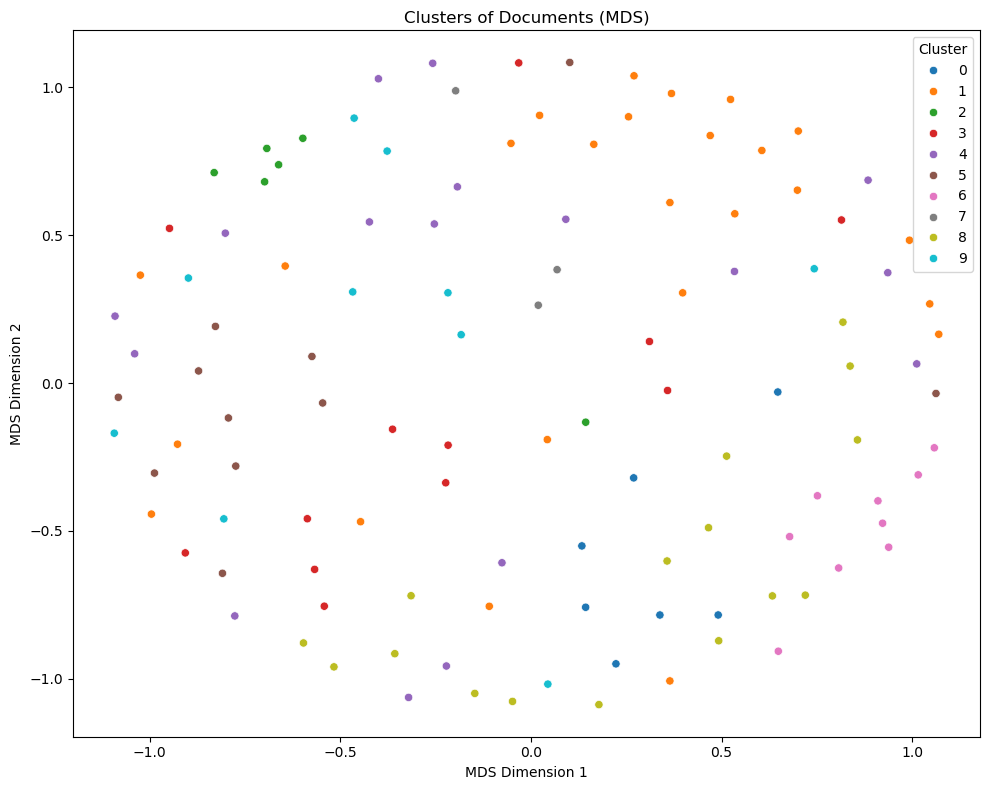

In [40]:
from sklearn.manifold import MDS
import seaborn as sns

# Apply MDS to reduce the dimensionality of the TF-IDF matrix
mds = MDS(n_components=2, random_state=42)
tfidf_mds = mds.fit_transform(X.toarray())

# Create a DataFrame for visualization
tfidf_mds_df = pd.DataFrame(tfidf_mds, columns=['MDS1', 'MDS2'], index=file_names)

# Add cluster labels to DataFrame
tfidf_mds_df['Cluster'] = cluster_labels

# Plot the clusters using MDS
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDS1', y='MDS2', hue='Cluster', data=tfidf_mds_df, palette='tab10', legend='full')
plt.title('Clusters of Documents (MDS)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


C:\Users\annis\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


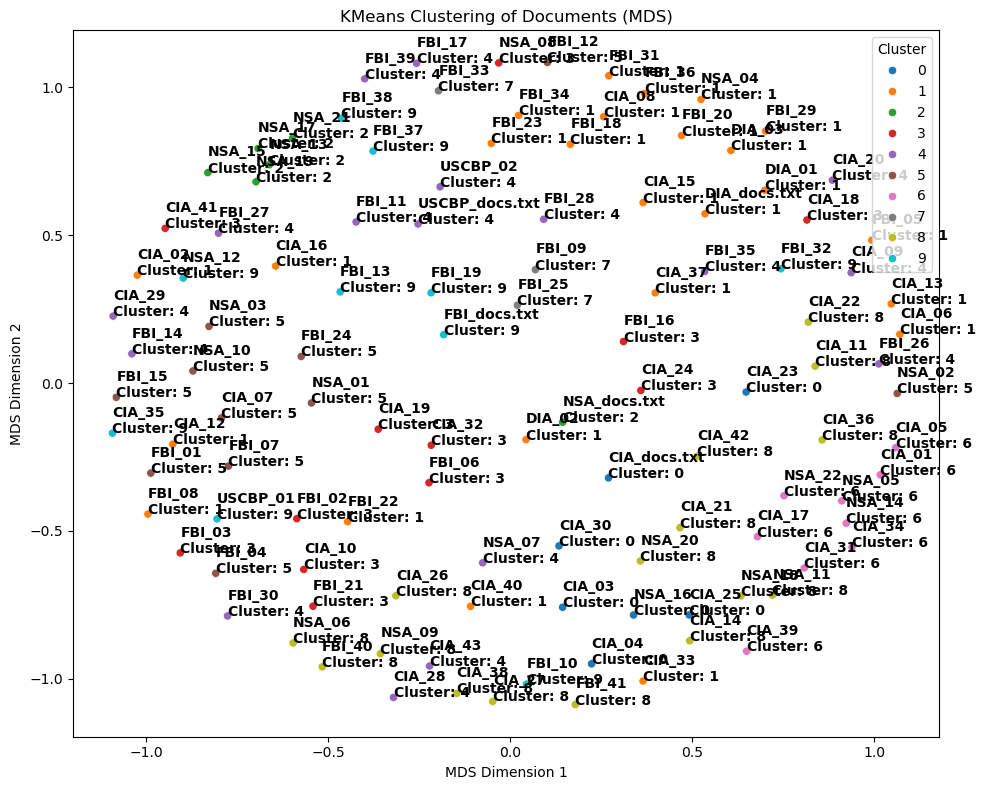

In [41]:
from sklearn.manifold import MDS

# Apply MDS to reduce the dimensionality of the TF-IDF matrix
mds = MDS(n_components=2, random_state=42)
tfidf_mds = mds.fit_transform(X.toarray())

# Create a DataFrame for visualization
tfidf_mds_df = pd.DataFrame(tfidf_mds, columns=['MDS1', 'MDS2'], index=file_names)

# Add cluster labels to DataFrame
tfidf_mds_df['Cluster'] = cluster_labels

# Plot the KMeans clusters using MDS
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='MDS1', y='MDS2', hue='Cluster', data=tfidf_mds_df, palette='tab10', legend='full')
plt.title('KMeans Clustering of Documents (MDS)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(title='Cluster')

import os

# Annotate each point with its file name and cluster label
for x, y, file_path, cluster_label in zip(tfidf_mds_df['MDS1'], tfidf_mds_df['MDS2'], tfidf_mds_df.index, tfidf_mds_df['Cluster']):
    file_name = os.path.basename(file_path)
    annotation_text = f"{file_name}\nCluster: {cluster_label}"
    scatterplot.text(x, y, annotation_text, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()



## 4. Adding it to json file for interactive visualization

In [42]:
import json
import numpy as np
from sklearn.metrics import pairwise_distances

# Calculate pairwise distances between documents
pairwise_dist = pairwise_distances(X.toarray())

# Convert cluster_labels to a JSON serializable type
cluster_labels_json = cluster_labels.astype(np.int64).tolist()

# Initialize JSON data structure
json_data = {
    'nodes': [],
    'links': []
}

# Add nodes (documents) to JSON data
for idx, (file_name, (mds1, mds2)) in enumerate(zip(file_names, tfidf_mds)):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.read()
    json_data['nodes'].append({
        'id': idx,
        'name': os.path.basename(file_name),
        'content': file_content,
        'cluster': cluster_labels_json[idx],
        'MDS1': mds1,
        'MDS2': mds2
    })

# Add links (distances) to JSON data
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):
        json_data['links'].append({
            'source': i,
            'target': j,
            'distance': float(pairwise_dist[i, j])
        })

# Save JSON data to a file
json_file_path = 'mds_clusters_with_content.json'
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

print("MDS clusters data with file content saved to:", json_file_path)


MDS clusters data with file content saved to: mds_clusters_with_content.json


In [15]:
import os
import json

# Initialize JSON data structure
json_data = {
    'nodes': [],
    'links': []
}

# Add cluster nodes to JSON data
for cluster, files in clusters.items():
    json_data['nodes'].append({
        'id': cluster,
        'type': 'cluster',
        'group': 1,  # Adjust group value as needed
        'files': [os.path.basename(file) for file in files]  # Extract file names without path
    })

# Add file nodes to JSON data
for file_name in file_names:
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.read()
    json_data['nodes'].append({
        'id': os.path.basename(file_name),
        'type': 'file',
        'group': 2,  # Adjust group value as needed
        'content': file_content
    })

# Add links between clusters and files to JSON data
for cluster, files in clusters.items():
    for file_name in files:
        json_data['links'].append({
            'source': cluster,
            'target': os.path.basename(file_name)  # Extract file name without path
        })

# Save JSON data to a file
json_file_path = 'clusters_and_files.json'
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

print("JSON data saved to:", json_file_path)


JSON data saved to: clusters_and_files.json


In [45]:
import os
import json

# Convert cluster_labels to regular Python integers
cluster_labels_python = [int(label) for label in cluster_labels]

# Initialize JSON data structure
json_data = {
    'nodes': [],
    'links': []
}

# Add cluster nodes to JSON data
for idx, (cluster, files) in enumerate(clusters.items()):
    json_data['nodes'].append({
        'id': idx,
        'type': 'cluster',
        'group': 1,  # Adjust group value as needed
        'files': [os.path.basename(file) for file in files]  # Extract file names without path
    })

# Add file nodes to JSON data
for file_name, cluster_id in zip(file_names, cluster_labels_python):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.read()
    json_data['nodes'].append({
        'id': os.path.basename(file_name),
        'type': 'file',
        'group': 2,  # Adjust group value as needed
        'content': file_content,
        'cluster': cluster_id  # Using cluster ID obtained from clustering
    })

# Add links between clusters and files to JSON data
for idx, (cluster, files) in enumerate(clusters.items()):
    for file_name in files:
        json_data['links'].append({
            'source': idx,
            'target': os.path.basename(file_name)  # Extract file name without path
        })

# Save JSON data to a file
json_file_path = 'clusters1_and_files.json'
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

print("JSON data saved to:", json_file_path)


JSON data saved to: clusters1_and_files.json
